In [2]:
import tensorflow as tf
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
 
root_path = r"D:\data set\data\distracted-driver-detection"
# # data_path = os.path.join(root_path, "data")
# train_path = os.path.join(data_path, "train")
model_path = os.path.join(root_path, "model")
if not os.path.exists(model_path):
    os.makedirs(model_path)



In [4]:
 
def load_images(path):
    images = []
    labels = []
    classes = os.listdir(path)
    for i, cls in enumerate(classes):
        class_path = os.path.join(path, cls)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
            labels.append(i)
    images = np.array(images)
    labels = np.array(labels)
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, classes



In [5]:
 
IMG_SIZE = 224
train_path=r"D:\data set\data\distracted-driver-detection\train"
 
train_images, test_images, train_labels, test_labels, classes = load_images(train_path)



In [6]:
 
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights="imagenet")
base_model.trainable = False
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(), #the average of all the spatial values in each channel
    tf.keras.layers.Dense(len(classes), activation="softmax")
])



In [7]:
 
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])



In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________
None


In [9]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_split=0.1)



Epoch 1/10
561/561 [==============================] - 781s 1s/step - loss: 1.7650 - accuracy: 0.4308 - val_loss: 1.4027 - val_accuracy: 0.5826
Epoch 2/10
561/561 [==============================] - 937s 2s/step - loss: 1.2167 - accuracy: 0.6576 - val_loss: 1.1248 - val_accuracy: 0.6693
Epoch 3/10
561/561 [==============================] - 859s 2s/step - loss: 0.9776 - accuracy: 0.7330 - val_loss: 0.9095 - val_accuracy: 0.7608
Epoch 4/10
561/561 [==============================] - 632s 1s/step - loss: 0.8360 - accuracy: 0.7776 - val_loss: 0.8185 - val_accuracy: 0.7862
Epoch 5/10
561/561 [==============================] - 614s 1s/step - loss: 0.7352 - accuracy: 0.8071 - val_loss: 0.7408 - val_accuracy: 0.7987
Epoch 6/10
561/561 [==============================] - 706s 1s/step - loss: 0.6579 - accuracy: 0.8312 - val_loss: 0.6748 - val_accuracy: 0.8140
Epoch 7/10
561/561 [==============================] - 754s 1s/step - loss: 0.6019 - accuracy: 0.8474 - val_loss: 0.6604 - val_accuracy: 0.8176

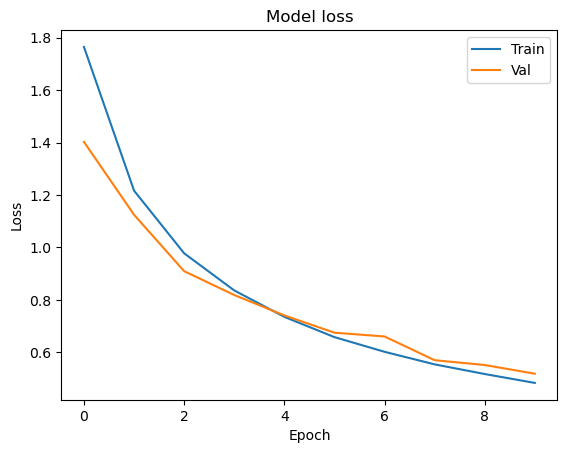

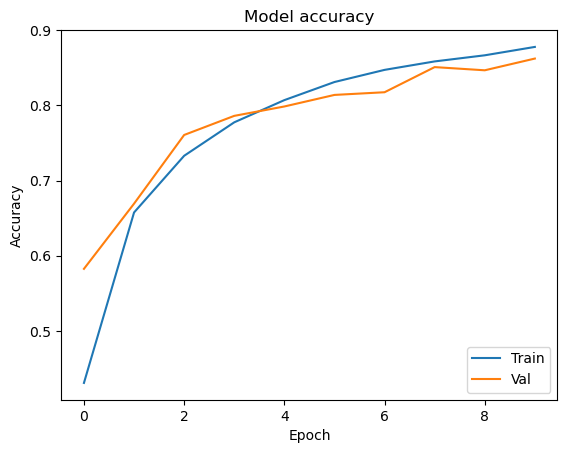

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [10]:
 
model.save(r"D:\IITG\ipml_project\mobilenet-main.h5")


In [13]:
y_pred=model.predict(test_images)

141/141 [==============================] - 123s 822ms/step


In [19]:
import numpy as np

pred_cls= np.argmax(y_pred, axis=1)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print('Accuracy:', accuracy_score(test_labels,pred_cls))
print('Confusion matrix:\n', confusion_matrix(test_labels, pred_cls))


Accuracy: 0.8624303232998886
Confusion matrix:
 [[379   5   1   5   3   7   6   4   3  18]
 [ 25 319  15  10   6   3  15  16  10   5]
 [  5   5 412  10   1   8   2  34  32  20]
 [  3   2   8 443   0   5   1   4   3   8]
 [ 10   5   0   0 365   0   2   7   1   9]
 [  8   3  12   2   1 391   6   5  40   5]
 [ 18   8   5   1   4   5 385   9   9  10]
 [  2   6  37   7   0   1   2 347   6   8]
 [  4   2   4   6   0   4   1   0 435   6]
 [  4   3   1   0   5   0   2   3  10 392]]


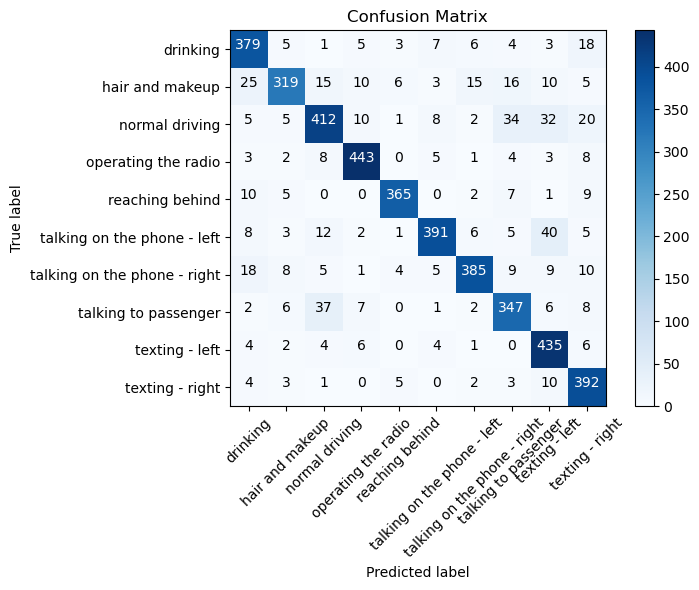

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

 
cm = confusion_matrix(test_labels, pred_cls)
 
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

 
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [40]:
d ={0:'drinking',
 1:'hair and makeup',
 2:'normal driving',
 3:'operating the radio',
 4:'reaching behind',
 5:'talking on the phone - left',
 6:'talking on the phone - right',
 7:'talking to passenger',
 8:'texting - left',
 9:'texting - right'}

In [43]:
from tensorflow.keras.models import load_model

def make_prediction(img):
    img = cv2.resize(img, (224, 224))
    img = img.astype('float32')
    img /= 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    return d[predicted_class]
def preprocess_image(img):
    img = cv2.resize(img, (224, 224))
    img = img.astype('float32')
    img /= 255.0
    img = np.expand_dims(img, axis=0)
    return img


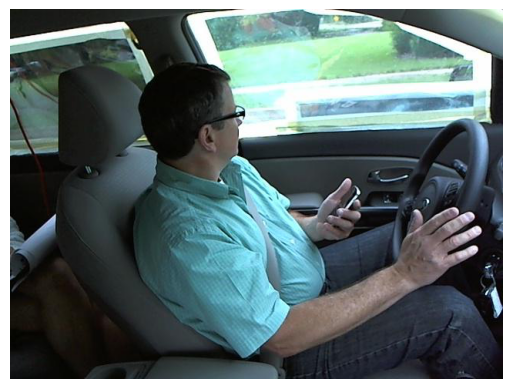

1/1 [==============================] - 0s 67ms/step
texting - left


In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
img = mpimg.imread(r"D:\data set\data\distracted-driver-detection\train\texting - left\img_1645.jpg")

 
plt.imshow(img)
plt.axis('off')
plt.show() 
    
    
    
print(make_prediction(img))

In [52]:
import numpy as np
import cv2

model = load_model(r"D:\IITG\ipml_project\mobilenet-main.h5") 
cap = cv2.VideoCapture(r"D:\IITG\ipml_project\test.mp4") 
output_file = r"D:\IITG\ipml_project\annotated_video.mp4"
output_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
output_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_file, fourcc, fps, (output_width, output_height))
 
while True:
    
    ret, frame = cap.read()
     
    if not ret:
        break
     
     
    preprocessed_frame = preprocess_image(frame)
    
    
    prediction = model.predict(preprocessed_frame)
    
  
    predicted_class = np.argmax(prediction)
    
     
    cv2.putText(frame, str(d[predicted_class]), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
     
    out.write(frame)
    
    
    cv2.imshow('frame', frame)
    
     
    if cv2.waitKey(1) == ord('q'):
        break

 
cap.release()
out.release()
 
cv2.destroyAllWindows()


In [53]:
classes

['drinking',
 'hair and makeup',
 'normal driving',
 'operating the radio',
 'reaching behind',
 'talking on the phone - left',
 'talking on the phone - right',
 'talking to passenger',
 'texting - left',
 'texting - right']